<a href="https://colab.research.google.com/github/aditya2k5/women_corelation_dataset/blob/main/wemon_corelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('WomenCorrelation.csv')

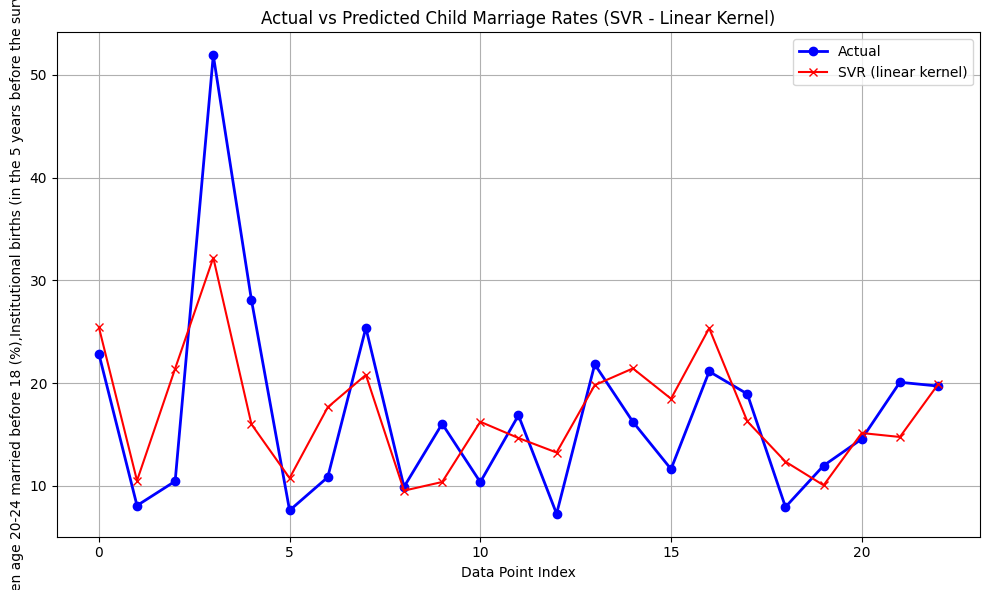

Mean Absolute Error (MAE): 5.03
Mean Squared Error (MSE): 43.74
Root Mean Squared Error (RMSE): 6.61
R² Score: 0.52


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


def clean_numeric(value):
    try:
        # Remove parentheses and other unwanted characters
        cleaned = str(value).replace('(', '').replace(')', '').strip()
        return float(cleaned)
    except (ValueError, AttributeError):
        # Return NaN for invalid values
        return np.nan

# Drop rows with missing values and clean the data
df_cleaned = df.dropna().copy()  # Create a copy to avoid SettingWithCopyWarning

# Apply cleaning to the relevant columns
df_cleaned["Women (age 15-49) who are literate4 (%),Institutional births (in the 5 years before the survey) (%),Women age 20-24 years married before age 18 years %"] = df_cleaned[
    "Women (age 15-49) who are literate4 (%)"
].apply(clean_numeric)
df_cleaned["Women age 20-24 years married before age 18 years (%)"] = df_cleaned[
    "Women age 20-24 years married before age 18 years (%)"
].apply(clean_numeric)

# Drop rows with NaN after cleaning
df_cleaned = df_cleaned.dropna()

# Define features and target variable
X = df_cleaned[["Women (age 15-49) who are literate4 (%),Institutional births (in the 5 years before the survey) (%),Women age 20-24 years married before age 18 years %"]]
y = df_cleaned["Women age 20-24 years married before age 18 years (%)"]

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features and target
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Initialize and train SVR model
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict and inverse scale the results
y_pred_svr_scaled = svr_model.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()

# Plot Actual vs Predicted (SVR only)
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual', marker='o', color='blue', linewidth=2)
plt.plot(range(len(y_pred_svr)), y_pred_svr, label='SVR (linear kernel)', color='red', marker='x')
plt.xlabel('Data Point Index')
plt.ylabel('Women age 20-24 married before 18 (%),Institutional births (in the 5 years before the survey) (%)')
plt.title('Actual vs Predicted Child Marriage Rates (SVR - Linear Kernel)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_svr)
mae = mean_absolute_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def clean_numeric(value):
    try:
        # Remove parentheses and other unwanted characters
        cleaned = str(value).replace('(', '').replace(')', '').strip()
        return float(cleaned)
    except (ValueError, AttributeError):
        # Return NaN for invalid values
        return np.nan

# Drop rows with missing values and clean the data
df_cleaned = df.dropna().copy()  # Create a copy to avoid SettingWithCopyWarning

# Apply cleaning to the relevant columns
df_cleaned["Women (age 15-49) who are literate4 (%),Institutional births (in the 5 years before the survey) (%)"] = df_cleaned[
    "Women (age 15-49) who are literate4 (%)"
].apply(clean_numeric)
df_cleaned["Women age 20-24 years married before age 18 years (%)"] = df_cleaned[
    "Women age 20-24 years married before age 18 years (%)"
].apply(clean_numeric)

# Drop rows with NaN after cleaning
df_cleaned = df_cleaned.dropna()

# Define features and target variable
X = df_cleaned[["Women (age 15-49) who are literate4 (%),Institutional births (in the 5 years before the survey) (%),Women age 20-24 years married before age 18 years (%"]]
y = df_cleaned["Women age 20-24 years married before age 18 years (%)"]

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (optional for linear regression, but kept for consistency)
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual', marker='o', color='blue', linewidth=2)
plt.plot(range(len(y_pred_lr)), y_pred_lr, label='Linear Regression', color='red', marker='x')
plt.xlabel('Data Point Index')
plt.ylabel('Women age 20-24 married before 18 (%),')
plt.title('Actual vs Predicted Child Marriage Rates (Linear Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot of literacy vs early marriage with regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_lr, color='red', label='Regression Line')
plt.xlabel('Women (age 15-49) literate (%),Institutional births (in the 5 years before the survey) (%),Women age 20-24 married before 18 (%)')
plt.ylabel('Women age 20-24 married before 18 (%)')
plt.title('Literacy vs Early Marriage (Linear Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

# Print results
print(f"Slope: {lr_model.coef_[0]:.2f}")
print(f"Intercept: {lr_model.intercept_:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

KeyError: "None of [Index(['Women (age 15-49) who are literate4 (%),Institutional births (in the 5 years before the survey) (%),Women age 20-24 years married before age 18 years (%'], dtype='object')] are in the [columns]"

Data Summary:
       Number of Households surveyed  \
count                      75.000000   
mean                      942.800000   
std                        50.807799   
min                       713.000000   
25%                       931.000000   
50%                       953.000000   
75%                       977.000000   
max                       989.000000   

       Number of Women age 15-49 years interviewed  \
count                                    75.000000   
mean                                   1241.653333   
std                                     123.448150   
min                                     805.000000   
25%                                    1177.000000   
50%                                    1258.000000   
75%                                    1316.500000   
max                                    1561.000000   

       Number of Men age 15-54 years interviewed  \
count                                  75.000000   
mean                              

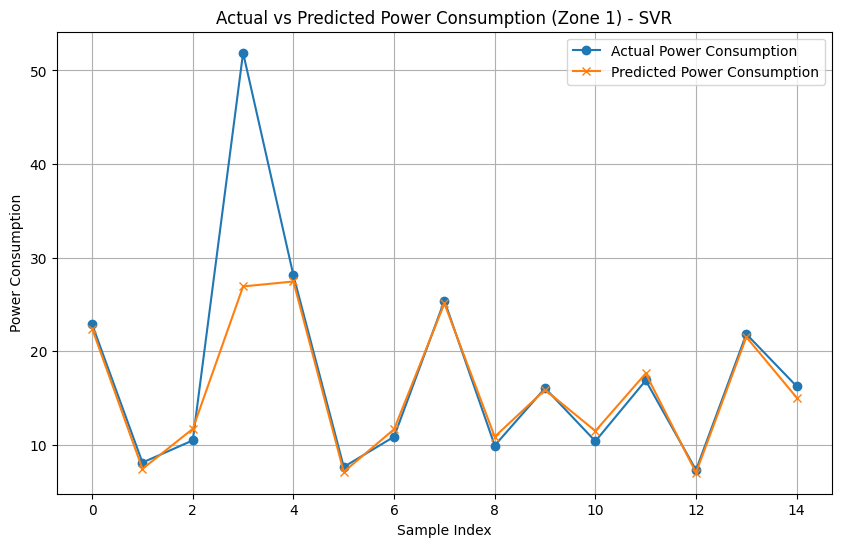

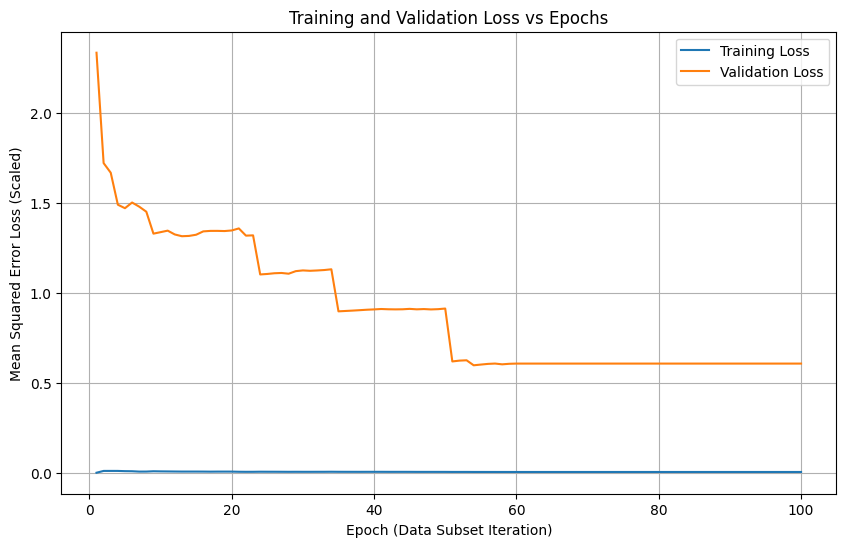

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data inspection
print("Data Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Features (consistent with previous code)
features = ['Women (age 15-49) who are literate4 (%)','Female population age 6 years and above who ever attended school (%)','Women age 20-24 years married before age 18 years (%)']
X = df[features]
y = df['Women age 20-24 years married before age 18 years (%)']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Standardize target variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Simulate epochs by incrementally increasing training data
n_epochs = 100
train_losses = []
val_losses = []
n_samples = len(X_train)
step_size = max(1, n_samples // n_epochs)  # Ensure at least 1 sample per step

# Initialize model
model = SVR(kernel='rbf', C=100, epsilon=0.1)

for epoch in range(n_epochs):
    # Use increasing subsets of training data
    end_idx = min((epoch + 1) * step_size, n_samples)
    X_train_subset = X_train[:end_idx]
    y_train_subset = y_train[:end_idx]

    # Train model on subset
    model.fit(X_train_subset, y_train_subset)

    # Compute training and validation loss
    y_pred_train = model.predict(X_train_subset)
    y_pred_val = model.predict(X_test)
    train_loss = mean_squared_error(y_train_subset, y_pred_train)
    val_loss = mean_squared_error(y_test, y_pred_val)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{n_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Final model training on full training data
model.fit(X_train, y_train)
y_pred_scaled = model.predict(X_test)

# Inverse transform for evaluation
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_orig = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Testing
mse = mean_squared_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_orig[:20000], label='Actual Power Consumption', marker='o')
plt.plot(y_pred[:20000], label='Predicted Power Consumption', marker='x')
plt.title('Actual vs Predicted Power Consumption (Zone 1) - SVR')
plt.xlabel('Sample Index')
plt.ylabel('Power Consumption')
plt.legend()
plt.grid(True)
plt.show()

# Plotting loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epoch (Data Subset Iteration)')
plt.ylabel('Mean Squared Error Loss (Scaled)')
plt.legend()
plt.grid(True)
plt.show()


Data Summary:
       Number of Households surveyed  \
count                      75.000000   
mean                      942.800000   
std                        50.807799   
min                       713.000000   
25%                       931.000000   
50%                       953.000000   
75%                       977.000000   
max                       989.000000   

       Number of Women age 15-49 years interviewed  \
count                                    75.000000   
mean                                   1241.653333   
std                                     123.448150   
min                                     805.000000   
25%                                    1177.000000   
50%                                    1258.000000   
75%                                    1316.500000   
max                                    1561.000000   

       Number of Men age 15-54 years interviewed  \
count                                  75.000000   
mean                              

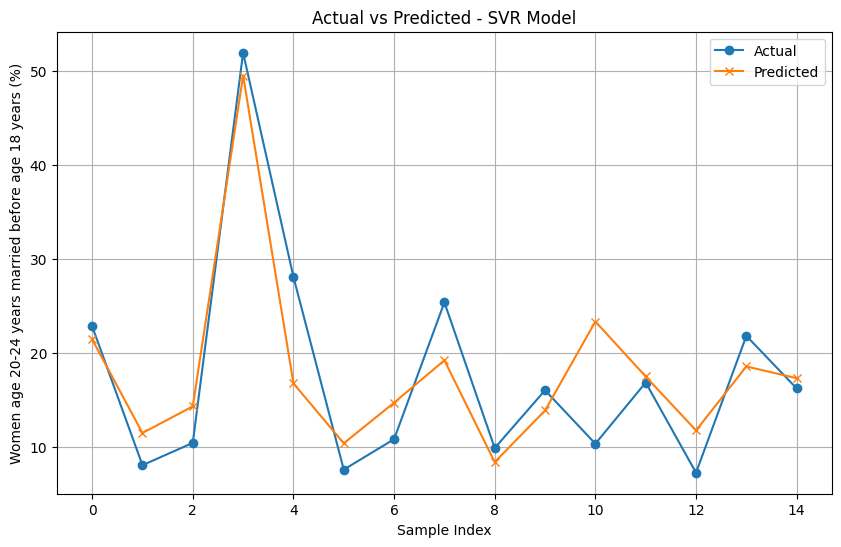

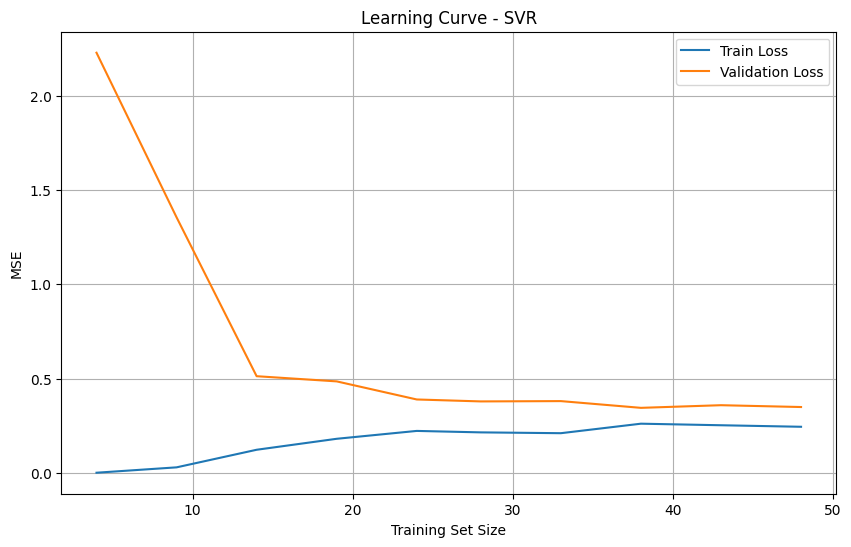

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import PolynomialFeatures  # Optional

# ------------------ Load & Inspect Data ------------------
print("Data Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# ------------------ Feature Selection ------------------
# ✅ Removed target column from features to avoid data leakage
features = [
    'Women (age 15-49) who are literate4 (%)',
    'Female population age 6 years and above who ever attended school (%)','All women age 15-19 years who are anaemic22 (%) '
]
target = 'Women age 20-24 years married before age 18 years (%)'

X = df[features]
y = df[target]

# ------------------ Optional: Polynomial Features ------------------
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X = poly.fit_transform(X)

# ------------------ Standardization ------------------
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# ------------------ Train-Test Split ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# ------------------ Grid Search for Hyperparameter Tuning ------------------
param_grid = {
    'C': [1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("\n✅ Best Parameters Found:", grid_search.best_params_)

# ------------------ Final Model with Best Params ------------------
model = grid_search.best_estimator_

# Train on full training data
model.fit(X_train, y_train)

# Predict on test data
y_pred_scaled = model.predict(X_test)

# Inverse transform to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# ------------------ Evaluation ------------------
mse = mean_squared_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\n🎯 Final Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# ------------------ Plot: Actual vs Predicted ------------------
plt.figure(figsize=(10, 6))
plt.plot(y_test_orig, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted - SVR Model')
plt.xlabel('Sample Index')
plt.ylabel(target)
plt.legend()
plt.grid(True)
plt.show()

# ------------------ Plot: Learning Curve (Optional) ------------------
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label="Train Loss")
plt.plot(train_sizes, val_errors, label="Validation Loss")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.title("Learning Curve - SVR")
plt.legend()
plt.grid(True)
plt.show()


Fitting 5 folds for each of 96 candidates, totalling 480 fits

✅ Best Parameters Found: {'C': 10, 'epsilon': 0.1, 'gamma': 0.001}

🎯 Final Evaluation (Improved SVR):
Mean Squared Error (MSE): 43.8516
R² Score: 0.6543


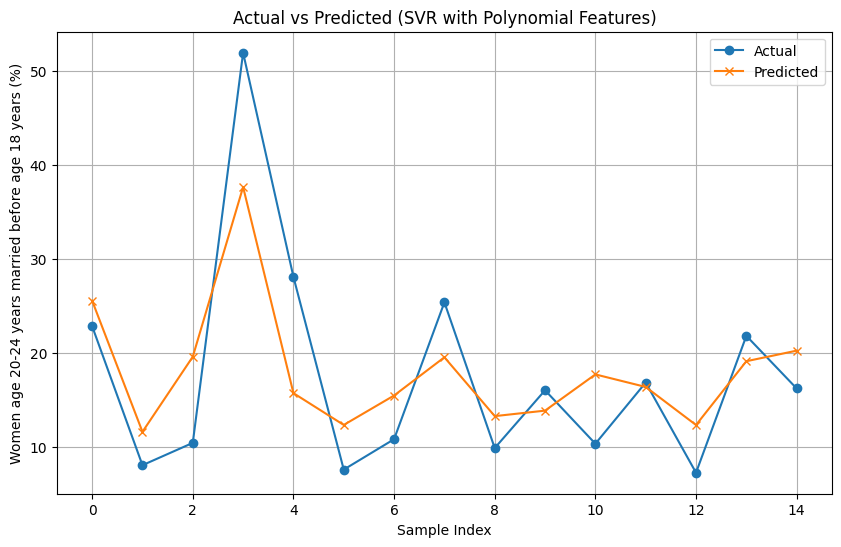

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV

# ------------------ Feature Selection ------------------
features = [
    'Women (age 15-49) who are literate4 (%)', 'Female population age 6 years and above who ever attended school (%)','Households using clean fuel for cooking3 (%)'


]
target = 'Women age 20-24 years married before age 18 years (%)'

X = df[features]
y = df[target]

# ------------------ Polynomial Feature Expansion ------------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# ------------------ Standardization ------------------
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X_poly)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# ------------------ Train-Test Split ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# ------------------ Grid Search for SVR ------------------
param_grid = {
    'C': [10, 100, 500, 1000],
    'epsilon': [0.001, 0.01, 0.1, 0.5],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

grid_search = GridSearchCV(
    SVR(kernel='linear'),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print("\n✅ Best Parameters Found:", grid_search.best_params_)

# ------------------ Final Model ------------------
model = grid_search.best_estimator_
model.fit(X_train, y_train)

# Predict
y_pred_scaled = model.predict(X_test)

# Inverse transform
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluation
mse = mean_squared_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\n🎯 Final Evaluation (Improved SVR):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_orig, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted (SVR with Polynomial Features)')
plt.xlabel('Sample Index')
plt.ylabel(target)
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - loss: 0.9158 - mae: 0.6361 - val_loss: 0.9885 - val_mae: 0.7490
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5886 - mae: 0.5629 - val_loss: 0.7888 - val_mae: 0.6818
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.4682 - mae: 0.4896 - val_loss: 0.6657 - val_mae: 0.6457
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.5977 - mae: 0.5446 - val_loss: 0.5826 - val_mae: 0.6163
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.5200 - mae: 0.5032 - val_loss: 0.5222 - val_mae: 0.5867
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.5237 - mae: 0.5166 - val_loss: 0.4947 - val_mae: 0.5743
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4671 - mae: 0.4950 - val_loss: 0.4854 - val_mae: 0.5714
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5881 - mae: 0.6017 - val_loss: 0.5006 - val_mae: 0.5833
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4779 - mae: 0.5201 - va

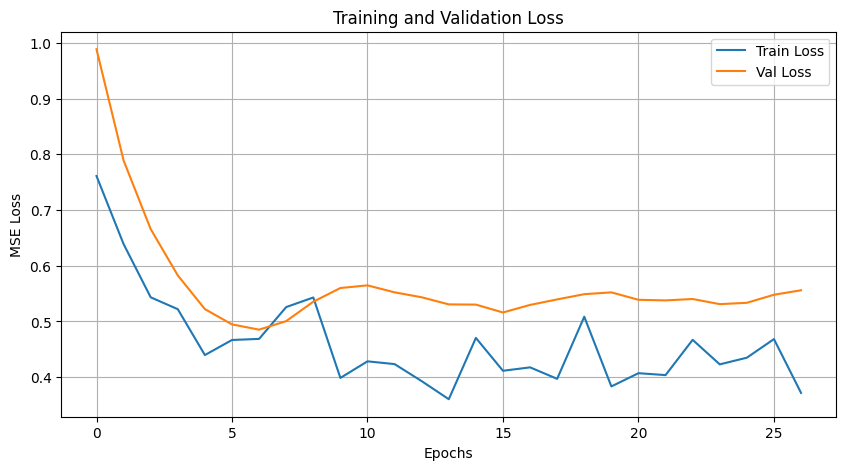

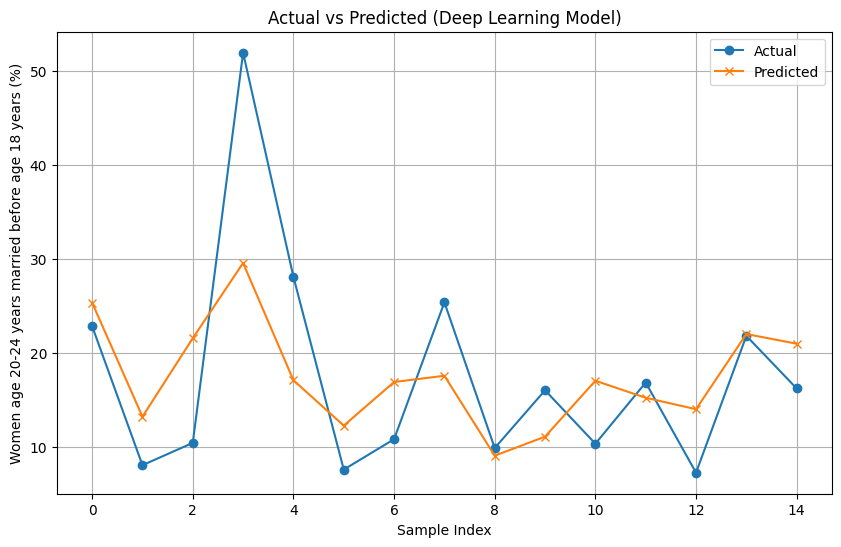

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ------------------ Feature Selection ------------------
features = [
    'Women (age 15-49) who are literate4 (%)',
    'Female population age 6 years and above who ever attended school (%)',
    'Households using clean fuel for cooking3 (%)'
]
target = 'Women age 20-24 years married before age 18 years (%)'

X = df[features]
y = df[target]

# ------------------ Polynomial Feature Expansion ------------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# ------------------ Standardization ------------------
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X_poly)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# ------------------ Train-Test Split ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# ------------------ Deep Learning Model ------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Linear output for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# ------------------ Evaluation ------------------
y_pred_scaled = model.predict(X_test).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test_orig, y_pred)
mae = mean_absolute_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_orig, y_pred)

# ------------------ Matrix-like Metrics Display ------------------
metrics_matrix = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R² Score'],
    'Value': [mae, mse, rmse, r2]
})
print("\n📊 Regression Metrics:")
print(metrics_matrix.to_string(index=False))

# ------------------ Loss Plot ------------------
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

# ------------------ Prediction Plot ------------------
plt.figure(figsize=(10, 6))
plt.plot(y_test_orig, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted (Deep Learning Model)')
plt.xlabel('Sample Index')
plt.ylabel(target)
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
dataset = loadtxt('WomenCorrelation.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset['Women (age 15-49) who are literate4 (%)',
    'Female population age 6 years and above who ever attended school (%)',
    'Households using clean fuel for cooking3 (%)'
]
y = dataset['Women age 20-24 years married before age 18 years (%)'
]
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

ValueError: could not convert string 'District Names' to float64 at row 0, column 1.